In [13]:
import os
import sys
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from multiprocessing import cpu_count, Pool

In [41]:
pd.options.display.max_columns = None

In [4]:
PATH = os.path.join('..', 'feature')

KEY = 'card_id'

In [5]:
train = pd.read_csv(os.path.join('..', 'data', 'train.csv'))
test = pd.read_csv(os.path.join('..', 'data', 'test.csv'))

# feature 3~

In [6]:
features = ['f302.pkl', 'f303.pkl', 'f304.pkl', 'f305.pkl', 'f306.pkl']

for f in features:
    print(f'Merge: {f}', end=' ')
    t = pd.read_pickle(os.path.join('..', 'feature', f))
    train = pd.merge(train, t, on=KEY, how='left')
    test = pd.merge(test, t, on=KEY, how='left')
    print('Done!!')

Merge: f302.pkl Done!!
Merge: f303.pkl Done!!
Merge: f304.pkl Done!!
Merge: f305.pkl Done!!
Merge: f306.pkl Done!!


In [7]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,mean_feature_1,mean_feature_2,mean_feature_3,first_active_month_year,...,score_log6_var,score_log6_skew,score_log12_nunique,score_log12_min,score_log12_max,score_log12_mean,score_log12_median,score_log12_std,score_log12_var,score_log12_skew
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,0.013145,0.008752,0.011428,2017,...,1084.550659,-10.773438,118,-387.750000,47.110001,-2.931731,-0.011223,35.995838,1295.700195,-10.593750
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,0.010712,0.011385,0.010283,2017,...,821.095398,-12.429688,151,-387.750000,10.613334,-2.628400,-0.024796,31.181223,972.268677,-12.390625
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,0.010610,0.008752,0.010283,2016,...,3.653824,-3.853516,15,-7.648438,0.156485,-0.541296,-0.019882,1.968720,3.875860,-3.857422
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,0.010712,0.014166,0.010283,2017,...,0.938893,-7.597656,59,-7.648438,0.174202,-0.152716,-0.014427,0.997257,0.994522,-7.578125
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,0.008058,0.014166,0.010283,2017,...,1401.205322,-7.929688,104,-387.750000,132.508804,-2.648154,-0.031738,40.304798,1624.476807,-8.257812


In [8]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,mean_feature_1,mean_feature_2,mean_feature_3,first_active_month_year,first_active_month_weekday,...,score_log6_var,score_log6_skew,score_log12_nunique,score_log12_min,score_log12_max,score_log12_mean,score_log12_median,score_log12_std,score_log12_var,score_log12_skew
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,0.010479,0.014166,0.011428,2017,5,...,6.439020,1.966797,28,-7.648438,10.713846,0.108396,-0.003914,2.534894,6.425689,1.777344
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,0.010610,0.014166,0.010283,2017,6,...,1.512339,-5.886719,37,-7.648438,0.250508,-0.300740,-0.013817,1.329575,1.767771,-5.156250
2,2017-08-01,C_ID_b709037bc5,5,1,1,0.013145,0.011385,0.011428,2017,1,...,0.035208,-0.101135,11,-0.392334,0.298501,-0.079152,-0.090149,0.182658,0.033364,0.418213
3,2017-12-01,C_ID_d27d835a9f,2,1,0,0.010610,0.011385,0.010283,2017,4,...,0.007921,-0.948242,33,-0.256592,0.123491,-0.037459,-0.023361,0.095107,0.009045,-0.676270
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,0.013145,0.011385,0.011428,2015,1,...,2.762244,1.127930,54,-7.648438,18.233334,0.249256,-0.026276,2.743382,7.526146,5.074219


In [71]:
del train['target']

In [72]:
train_corr = train.corr()

In [73]:
train_corr.head()

,feature_1,feature_2,feature_3,mean_feature_1,mean_feature_2,mean_feature_3,first_active_month_year,first_active_month_weekday,first_active_month_month,first_active_month_dayofweek,first_active_month_weekofyear,elapsed_time,historica_merchants_transactions_count,historica_merchants_merchant_group_id_nunique,historica_merchants_numerical_1_min,historica_merchants_numerical_1_max,historica_merchants_numerical_1_mean,historica_merchants_numerical_1_median,historica_merchants_numerical_1_std,historica_merchants_numerical_1_var,historica_merchants_numerical_1_skew,historica_merchants_numerical_2_min,historica_merchants_numerical_2_max,historica_merchants_numerical_2_mean,historica_merchants_numerical_2_median,historica_merchants_numerical_2_std,historica_merchants_numerical_2_var,historica_merchants_numerical_2_skew,historica_merchants_category_1_sum,historica_merchants_category_1_mean,historica_merchants_category_2_sum,historica_merchants_category_2_mean,historica_merchants_category_4_sum,historica_merchants_category_4_mean,historica_merchants_city_id_nunique,historica_merchants_state_id_nunique,new_merchants_transactions_count,new_merchants_merchant_group_id_nunique,new_merchants_numerical_1_min,new_merchants_numerical_1_max,new_merchants_numerical_1_mean,new_merchants_numerical_1_median,new_merchants_numerical_1_std,new_merchants_numerical_1_var,new_merchants_numerical_1_skew,new_merchants_numerical_2_min,new_merchants_numerical_2_max,new_merchants_numerical_2_mean,new_merchants_numerical_2_median,new_merchants_numerical_2_std,new_merchants_numerical_2_var,new_merchants_numerical_2_skew,new_merchants_category_1_sum,new_merchants_category_1_mean,new_merchants_category_2_sum,new_merchants_category_2_mean,new_merchants_category_4_sum,new_merchants_category_4_mean,new_merchants_city_id_nunique,new_merchants_state_id_nunique,union_merchants_transactions_count,union_merchants_merchant_group_id_nunique,union_merchants_numerical_1_min,union_merchants_numerical_1_max,union_merchants_numerical_1_mean,union_merchants_numerical_1_median,union_merchants_numerical_1_std,union_merchants_numerical_1_var,union_merchants_numerical_1_skew,union_merchants_numerical_2_min,union_merchants_numerical_2_max,union_merchants_numerical_2_mean,union_merchants_numerical_2_median,union_merchants_numerical_2_std,union_merchants_numerical_2_var,union_merchants_numerical_2_skew,union_merchants_category_1_sum,union_merchants_category_1_mean,union_merchants_category_2_sum,union_merchants_category_2_mean,union_merchants_category_4_sum,union_merchants_category_4_mean,union_merchants_city_id_nunique,union_merchants_state_id_nunique,merchants_transactions_count,merchants_most_recent_sales_range_nunique,merchants_most_recent_purchases_range_nunique,merchants_avg_sales_lag3_nunique,merchants_avg_sales_lag3_min,merchants_avg_sales_lag3_max,merchants_avg_sales_lag3_mean,merchants_avg_sales_lag3_median,merchants_avg_sales_lag3_std,merchants_avg_sales_lag3_var,merchants_avg_sales_lag3_skew,merchants_avg_purchases_lag3_nunique,merchants_avg_purchases_lag3_min,merchants_avg_purchases_lag3_max,merchants_avg_purchases_lag3_mean,merchants_avg_purchases_lag3_median,merchants_avg_purchases_lag3_std,merchants_avg_purchases_lag3_var,merchants_avg_purchases_lag3_skew,merchants_active_months_lag3_nunique,merchants_active_months_lag3_min,merchants_active_months_lag3_max,merchants_active_months_lag3_mean,merchants_active_months_lag3_median,merchants_active_months_lag3_std,merchants_active_months_lag3_var,merchants_active_months_lag3_skew,merchants_avg_sales_lag6_nunique,merchants_avg_sales_lag6_min,merchants_avg_sales_lag6_max,merchants_avg_sales_lag6_mean,merchants_avg_sales_lag6_median,merchants_avg_sales_lag6_std,merchants_avg_sales_lag6_var,merchants_avg_sales_lag6_skew,merchants_avg_purchases_lag6_nunique,merchants_avg_purchases_lag6_min,merchants_avg_purchases_lag6_max,merchants_avg_purchases_lag6_mean,merchants_avg_purchases_lag6_median,merchants_avg_purchases_lag6_std,merchants_

In [67]:
test_corr = test.corr()

In [74]:
test_corr.head()

,feature_1,feature_2,feature_3,mean_feature_1,mean_feature_2,mean_feature_3,first_active_month_year,first_active_month_weekday,first_active_month_month,first_active_month_dayofweek,first_active_month_weekofyear,elapsed_time,historica_merchants_transactions_count,historica_merchants_merchant_group_id_nunique,historica_merchants_numerical_1_min,historica_merchants_numerical_1_max,historica_merchants_numerical_1_mean,historica_merchants_numerical_1_median,historica_merchants_numerical_1_std,historica_merchants_numerical_1_var,historica_merchants_numerical_1_skew,historica_merchants_numerical_2_min,historica_merchants_numerical_2_max,historica_merchants_numerical_2_mean,historica_merchants_numerical_2_median,historica_merchants_numerical_2_std,historica_merchants_numerical_2_var,historica_merchants_numerical_2_skew,historica_merchants_category_1_sum,historica_merchants_category_1_mean,historica_merchants_category_2_sum,historica_merchants_category_2_mean,historica_merchants_category_4_sum,historica_merchants_category_4_mean,historica_merchants_city_id_nunique,historica_merchants_state_id_nunique,new_merchants_transactions_count,new_merchants_merchant_group_id_nunique,new_merchants_numerical_1_min,new_merchants_numerical_1_max,new_merchants_numerical_1_mean,new_merchants_numerical_1_median,new_merchants_numerical_1_std,new_merchants_numerical_1_var,new_merchants_numerical_1_skew,new_merchants_numerical_2_min,new_merchants_numerical_2_max,new_merchants_numerical_2_mean,new_merchants_numerical_2_median,new_merchants_numerical_2_std,new_merchants_numerical_2_var,new_merchants_numerical_2_skew,new_merchants_category_1_sum,new_merchants_category_1_mean,new_merchants_category_2_sum,new_merchants_category_2_mean,new_merchants_category_4_sum,new_merchants_category_4_mean,new_merchants_city_id_nunique,new_merchants_state_id_nunique,union_merchants_transactions_count,union_merchants_merchant_group_id_nunique,union_merchants_numerical_1_min,union_merchants_numerical_1_max,union_merchants_numerical_1_mean,union_merchants_numerical_1_median,union_merchants_numerical_1_std,union_merchants_numerical_1_var,union_merchants_numerical_1_skew,union_merchants_numerical_2_min,union_merchants_numerical_2_max,union_merchants_numerical_2_mean,union_merchants_numerical_2_median,union_merchants_numerical_2_std,union_merchants_numerical_2_var,union_merchants_numerical_2_skew,union_merchants_category_1_sum,union_merchants_category_1_mean,union_merchants_category_2_sum,union_merchants_category_2_mean,union_merchants_category_4_sum,union_merchants_category_4_mean,union_merchants_city_id_nunique,union_merchants_state_id_nunique,merchants_transactions_count,merchants_most_recent_sales_range_nunique,merchants_most_recent_purchases_range_nunique,merchants_avg_sales_lag3_nunique,merchants_avg_sales_lag3_min,merchants_avg_sales_lag3_max,merchants_avg_sales_lag3_mean,merchants_avg_sales_lag3_median,merchants_avg_sales_lag3_std,merchants_avg_sales_lag3_var,merchants_avg_sales_lag3_skew,merchants_avg_purchases_lag3_nunique,merchants_avg_purchases_lag3_min,merchants_avg_purchases_lag3_max,merchants_avg_purchases_lag3_mean,merchants_avg_purchases_lag3_median,merchants_avg_purchases_lag3_std,merchants_avg_purchases_lag3_var,merchants_avg_purchases_lag3_skew,merchants_active_months_lag3_nunique,merchants_active_months_lag3_min,merchants_active_months_lag3_max,merchants_active_months_lag3_mean,merchants_active_months_lag3_median,merchants_active_months_lag3_std,merchants_active_months_lag3_var,merchants_active_months_lag3_skew,merchants_avg_sales_lag6_nunique,merchants_avg_sales_lag6_min,merchants_avg_sales_lag6_max,merchants_avg_sales_lag6_mean,merchants_avg_sales_lag6_median,merchants_avg_sales_lag6_std,merchants_avg_sales_lag6_var,merchants_avg_sales_lag6_skew,merchants_avg_purchases_lag6_nunique,merchants_avg_purchases_lag6_min,merchants_avg_purchases_lag6_max,merchants_avg_purchases_lag6_mean,merchants_avg_purchases_lag6_median,merchants_avg_purchases_lag6_std,merchants_

In [46]:
# train_corr.columns = [i for i, _ in enumerate(train_corr.columns)]
# test_corr.columns = [i for i, _ in enumerate(test_corr.columns)]

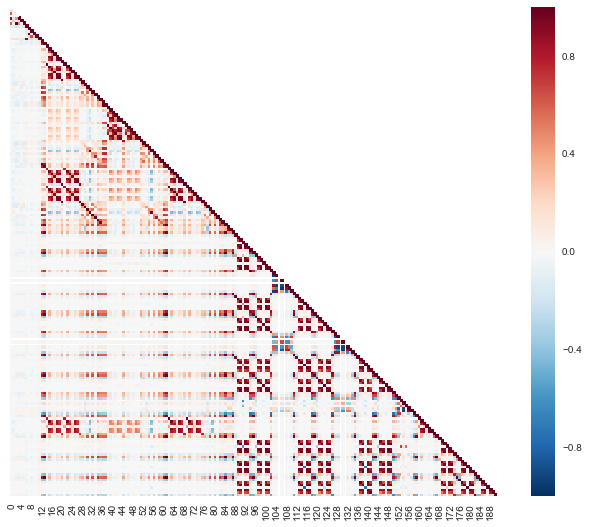

In [47]:
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.figure(figsize=(12, 9))
    ax = sns.heatmap(train_corr, mask=mask, square=True, xticklabels=4, yticklabels=False)

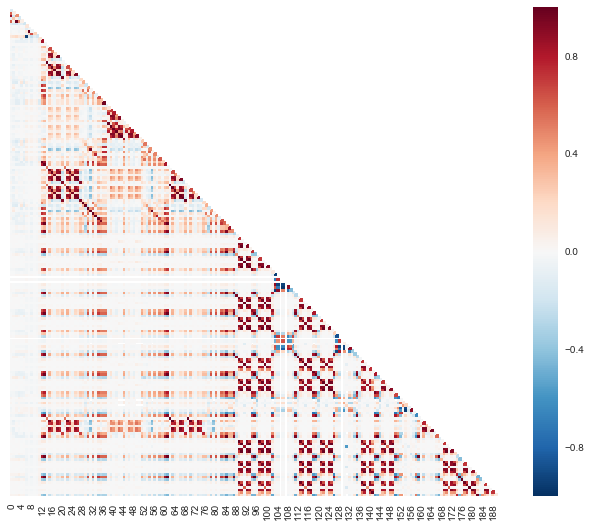

In [48]:
mask = np.zeros_like(test_corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.figure(figsize=(12, 9))
    ax = sns.heatmap(test_corr, mask=mask, square=True, xticklabels=4, yticklabels=False)

In [75]:
corr = train_corr - test_corr

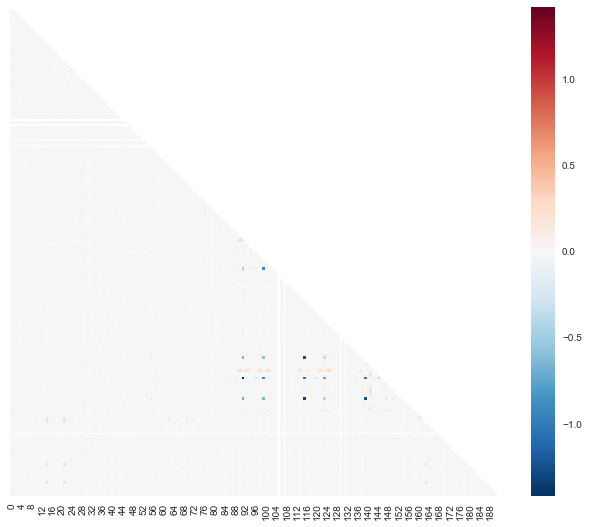

In [50]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.figure(figsize=(12, 9))
    ax = sns.heatmap(corr, mask=mask, square=True, xticklabels=4, yticklabels=False)

In [76]:
corr.head()

,feature_1,feature_2,feature_3,mean_feature_1,mean_feature_2,mean_feature_3,first_active_month_year,first_active_month_weekday,first_active_month_month,first_active_month_dayofweek,first_active_month_weekofyear,elapsed_time,historica_merchants_transactions_count,historica_merchants_merchant_group_id_nunique,historica_merchants_numerical_1_min,historica_merchants_numerical_1_max,historica_merchants_numerical_1_mean,historica_merchants_numerical_1_median,historica_merchants_numerical_1_std,historica_merchants_numerical_1_var,historica_merchants_numerical_1_skew,historica_merchants_numerical_2_min,historica_merchants_numerical_2_max,historica_merchants_numerical_2_mean,historica_merchants_numerical_2_median,historica_merchants_numerical_2_std,historica_merchants_numerical_2_var,historica_merchants_numerical_2_skew,historica_merchants_category_1_sum,historica_merchants_category_1_mean,historica_merchants_category_2_sum,historica_merchants_category_2_mean,historica_merchants_category_4_sum,historica_merchants_category_4_mean,historica_merchants_city_id_nunique,historica_merchants_state_id_nunique,new_merchants_transactions_count,new_merchants_merchant_group_id_nunique,new_merchants_numerical_1_min,new_merchants_numerical_1_max,new_merchants_numerical_1_mean,new_merchants_numerical_1_median,new_merchants_numerical_1_std,new_merchants_numerical_1_var,new_merchants_numerical_1_skew,new_merchants_numerical_2_min,new_merchants_numerical_2_max,new_merchants_numerical_2_mean,new_merchants_numerical_2_median,new_merchants_numerical_2_std,new_merchants_numerical_2_var,new_merchants_numerical_2_skew,new_merchants_category_1_sum,new_merchants_category_1_mean,new_merchants_category_2_sum,new_merchants_category_2_mean,new_merchants_category_4_sum,new_merchants_category_4_mean,new_merchants_city_id_nunique,new_merchants_state_id_nunique,union_merchants_transactions_count,union_merchants_merchant_group_id_nunique,union_merchants_numerical_1_min,union_merchants_numerical_1_max,union_merchants_numerical_1_mean,union_merchants_numerical_1_median,union_merchants_numerical_1_std,union_merchants_numerical_1_var,union_merchants_numerical_1_skew,union_merchants_numerical_2_min,union_merchants_numerical_2_max,union_merchants_numerical_2_mean,union_merchants_numerical_2_median,union_merchants_numerical_2_std,union_merchants_numerical_2_var,union_merchants_numerical_2_skew,union_merchants_category_1_sum,union_merchants_category_1_mean,union_merchants_category_2_sum,union_merchants_category_2_mean,union_merchants_category_4_sum,union_merchants_category_4_mean,union_merchants_city_id_nunique,union_merchants_state_id_nunique,merchants_transactions_count,merchants_most_recent_sales_range_nunique,merchants_most_recent_purchases_range_nunique,merchants_avg_sales_lag3_nunique,merchants_avg_sales_lag3_min,merchants_avg_sales_lag3_max,merchants_avg_sales_lag3_mean,merchants_avg_sales_lag3_median,merchants_avg_sales_lag3_std,merchants_avg_sales_lag3_var,merchants_avg_sales_lag3_skew,merchants_avg_purchases_lag3_nunique,merchants_avg_purchases_lag3_min,merchants_avg_purchases_lag3_max,merchants_avg_purchases_lag3_mean,merchants_avg_purchases_lag3_median,merchants_avg_purchases_lag3_std,merchants_avg_purchases_lag3_var,merchants_avg_purchases_lag3_skew,merchants_active_months_lag3_nunique,merchants_active_months_lag3_min,merchants_active_months_lag3_max,merchants_active_months_lag3_mean,merchants_active_months_lag3_median,merchants_active_months_lag3_std,merchants_active_months_lag3_var,merchants_active_months_lag3_skew,merchants_avg_sales_lag6_nunique,merchants_avg_sales_lag6_min,merchants_avg_sales_lag6_max,merchants_avg_sales_lag6_mean,merchants_avg_sales_lag6_median,merchants_avg_sales_lag6_std,merchants_avg_sales_lag6_var,merchants_avg_sales_lag6_skew,merchants_avg_purchases_lag6_nunique,merchants_avg_purchases_lag6_min,merchants_avg_purchases_lag6_max,merchants_avg_purchases_lag6_mean,merchants_avg_purchases_lag6_median,merchants_avg_purchases_lag6_std,merchants_

In [78]:
drop = []
for i in corr.columns:
    if corr[i].max() > 0.5 or corr[i].min() < -0.5: 
        print(i, corr[i].max())
        print(i, corr[i].min())
        drop.append(i)

merchants_avg_sales_lag3_median 0.32728889283749907
merchants_avg_sales_lag3_median -1.4194425259656258
merchants_avg_purchases_lag3_median 0.2096013767670406
merchants_avg_purchases_lag3_median -0.9301112700783521
merchants_avg_sales_lag6_median 0.11089624848913926
merchants_avg_sales_lag6_median -1.3126963219281018
merchants_avg_purchases_lag6_median 0.11211493669074196
merchants_avg_purchases_lag6_median -0.7898018384423982
merchants_avg_sales_lag12_median 0.11306506997901225
merchants_avg_sales_lag12_median -1.2419054256137674
merchants_avg_purchases_lag12_median 0.2096013767670406
merchants_avg_purchases_lag12_median -0.7165501641257386
merchants_active_months_lag12_max 0.5817807172026876
merchants_active_months_lag12_max -0.5855209107763013
merchants_active_months_lag12_median 0.6582863111144925
merchants_active_months_lag12_median -0.3353518499973659
score_log3_median 0.6582863111144925
score_log3_median -1.4194425259656258
score_log6_median 0.113154097415596
score_log6_median -

In [79]:
drop

['merchants_avg_sales_lag3_median',
 'merchants_avg_purchases_lag3_median',
 'merchants_avg_sales_lag6_median',
 'merchants_avg_purchases_lag6_median',
 'merchants_avg_sales_lag12_median',
 'merchants_avg_purchases_lag12_median',
 'merchants_active_months_lag12_max',
 'merchants_active_months_lag12_median',
 'score_log3_median',
 'score_log6_median',
 'score_log12_median']

# feature 1~, 2~, 4~

In [81]:
features = ['f103.pkl', 'f105.pkl', 'f109.pkl', 'f111.pkl']
features += ['f107_N.pkl', 'f107_Y.pkl',
             'f108_N.pkl', 'f108_Y.pkl',
             'f110_N.pkl', 'f110_Y.pkl']
features += ['f203.pkl', 'f205.pkl', 'f209.pkl']
features += ['f207_N.pkl', 'f207_Y.pkl',
             'f208_N.pkl', 'f208_Y.pkl',
             'f210_N.pkl', 'f210_Y.pkl']
features += ['f403.pkl', 'f404.pkl', 'f409.pkl', 'f411.pkl']
features += ['f406_N.pkl', 'f406_Y.pkl',
             'f407_N.pkl', 'f407_Y.pkl',
             'f408_N.pkl', 'f408_Y.pkl']
# features += ['f501.pkl']

for f in features:
    print(f'Merge: {f}', end=' ')
    t = pd.read_pickle(os.path.join('..', 'feature', f))
    train = pd.merge(train, t, on=KEY, how='left')
    test = pd.merge(test, t, on=KEY, how='left')
    print('Done!!')

In [83]:

drop_col = [
    'N_authorized_flag_x',
    'Y_authorized_flag_x',
    'N_authorized_flag_y',
    'Y_authorized_flag_y',
    'union_transactions_count_x',
    'union_transactions_count_y',
    'first_active_month_dayofweek', 
    'Y_union_transactions_count_x', 
    'Y_hist_auth_transactions_count', 
    'historica_merchants_transactions_count', 
    'hist_purchase_date_diff', 
    'union_purchase_date_min',
    'union_month_lag_min', 
    'union_1_2017_rate',
    'union_2_2017_rate', 
    'union_log_1_2017_rate', 
    'union_log_2_2017_rate', 
    'Y_hist_auth_transactions_count', 
    'historica_merchants_transactions_count', 
    'N_union_auth_purchase_date_max', 
    'N_union_auth_purchase_date_min', 
    'historica_merchants_transactions_count', 
    'Y_hist_auth_purchase_date_diff', 
    'Y_union_auth_purchase_date_min', 
    'Y_union_auth_month_lag_min', 
    'hist_Y_installments_count_mean_x', 
    'hist_Y_installments_count_std_x', 
    'hist_Y_installments_count_var_x', 
    'Y_new_auth_purchase_date_max', 
    'Y_new_auth_purchase_date_min', 
    'N_new_auth_purchase_date_min', 
    'Y_union_transactions_count', 
    'Y_union_auth_transactions_count', 
    'merchants_active_months_lag3_median',
    'union_installments_count_mean', 
    'union_installments_count_std', 
    'union_installments_count_var', 
    'union_purchase_date_diff', 
    'Y_union_auth_transactions_count', 
    'union_Y_installments_count_mean', 
    'union_Y_installments_count_std', 
    'union_Y_installments_count_var', 
    'Y_union_auth_purchase_date_diff'
]

train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

In [91]:
for f in [
    'hist_purchase_date_max', 'hist_purchase_date_min',
    'N_hist_auth_purchase_date_max', 'N_hist_auth_purchase_date_min',
    'Y_hist_auth_purchase_date_max', 'Y_hist_auth_purchase_date_min',
#     'new_purchase_date_max', 'new_purchase_date_min',
#     'N_new_auth_purchase_date_max', 'N_new_auth_purchase_date_min',
#     'Y_new_auth_purchase_date_max', 'Y_new_auth_purchase_date_min',
#     'union_purchase_date_max', 'union_purchase_date_min',
#     'N_union_auth_purchase_date_max', 'N_union_auth_purchase_date_min',
#     'Y_union_auth_purchase_date_max', 'Y_union_auth_purchase_date_min'
]:
    train[f] = train[f].astype(np.int64) * 1e-9
    test[f] = test[f].astype(np.int64) * 1e-9

In [93]:
train.shape, test.shape

((201917, 1245), (123623, 1245))

In [94]:
train_corr = train.corr()
test_corr = test.corr()

In [95]:
corr = train_corr - test_corr 

In [109]:
drop = []
for i in corr.columns:
    if corr[i].max() > 0.2 or corr[i].min() < -0.2: 
        print(i, corr[i].max())
        print(i, corr[i].min())
        drop.append(i)

historica_merchants_numerical_1_min 0.24851740575255266
historica_merchants_numerical_1_min -0.023345664242202822
historica_merchants_numerical_2_min 0.2498338117595128
historica_merchants_numerical_2_min -0.023311042229156177
historica_merchants_category_1_sum 0.08048742098786513
historica_merchants_category_1_sum -0.4381692030031118
historica_merchants_category_1_mean 0.24396807200974488
historica_merchants_category_1_mean -0.12200767887817895
union_merchants_numerical_1_min 0.2498338117595128
union_merchants_numerical_1_min -0.05227684465749785
union_merchants_numerical_2_min 0.24851740575255266
union_merchants_numerical_2_min -0.03364687352351566
union_merchants_category_1_sum 0.08294910776918718
union_merchants_category_1_sum -0.43600096226233587
union_merchants_category_1_mean 0.24719981623966492
union_merchants_category_1_mean -0.12457142384447076
merchants_avg_sales_lag3_mean 0.24139527414479833
merchants_avg_sales_lag3_mean -0.06964386110894986
merchants_avg_sales_lag3_median 

new_purchase_amount_min_mean 0.3340941867065714
new_purchase_amount_min_mean -0.5474351732137983
new_purchase_amount_min_std 0.3680730732095517
new_purchase_amount_min_std -0.19669078328013567
new_purchase_amount_min_var 0.8048944229718763
new_purchase_amount_min_var -0.07748618355791143
new_purchase_amount_max_mean 0.11796663497414028
new_purchase_amount_max_mean -0.4520541595383631
new_purchase_amount_max_var 0.18871775524589643
new_purchase_amount_max_var -0.34480914953798253
new_purchase_amount_mean_mean 0.19792904763016386
new_purchase_amount_mean_mean -0.5426571236327866
new_purchase_amount_mean_std 0.18798771180845875
new_purchase_amount_mean_std -0.21231332273698983
new_purchase_amount_mean_var 0.6663863071600372
new_purchase_amount_mean_var -0.31099122146376135
new_purchase_amount_median_mean 0.20648804467732573
new_purchase_amount_median_mean -0.5449405743060889
new_purchase_amount_median_std 0.18206581148621245
new_purchase_amount_median_std -0.22046572898072025
new_purchase

union_Y_installments_max_mean -0.19276560104172477
union_Y_installments_max_std 0.16502474348579593
union_Y_installments_max_std -0.2334689885390439
union_Y_installments_max_var 0.16615529634201087
union_Y_installments_max_var -0.36198319750500807
union_Y_installments_mean_mean 0.4600638254609922
union_Y_installments_mean_mean -0.3279310618414146
union_Y_installments_mean_std 0.3134866932518897
union_Y_installments_mean_std -0.3041946339912501
union_Y_installments_mean_var 0.6425952304952776
union_Y_installments_mean_var -0.8801262626771168
union_Y_installments_mean_skew 0.21841993981564267
union_Y_installments_mean_skew -0.08799301303821663
union_Y_installments_median_mean 0.4817913348508202
union_Y_installments_median_mean -0.3477391232260012
union_Y_installments_median_std 0.37137614361642224
union_Y_installments_median_std -0.5345756350661982
union_Y_installments_median_var 0.876096486264456
union_Y_installments_median_var -0.98675328532318
union_Y_installments_median_skew 0.264488

In [110]:
len(drop)

396

In [113]:
set(drop)

{'N_hist_auth_installments_max',
 'N_hist_auth_installments_mean',
 'N_hist_auth_installments_min',
 'N_hist_auth_installments_sum',
 'N_hist_auth_purchase_amount_max',
 'N_hist_auth_purchase_amount_mean',
 'N_hist_auth_purchase_amount_min',
 'N_hist_auth_purchase_amount_sum',
 'N_union_auth_installments_max',
 'N_union_auth_installments_mean',
 'N_union_auth_installments_min',
 'N_union_auth_installments_sum',
 'N_union_auth_purchase_amount_max',
 'N_union_auth_purchase_amount_mean',
 'N_union_auth_purchase_amount_min',
 'N_union_auth_purchase_amount_sum',
 'Y_hist_auth_category_1_mean',
 'Y_hist_auth_category_1_nunique',
 'Y_hist_auth_category_3_nunique',
 'Y_hist_auth_installments_max',
 'Y_hist_auth_installments_mean',
 'Y_hist_auth_installments_std',
 'Y_hist_auth_purchase_amount_max',
 'Y_hist_auth_purchase_amount_mean',
 'Y_hist_auth_purchase_amount_min',
 'Y_hist_auth_purchase_amount_std',
 'Y_hist_auth_purchase_amount_sum',
 'Y_hist_auth_purchase_date_average',
 'Y_new_auth_ca